#                                                                Cleaning Hotel Booking Data

### First we import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from thefuzz import process
import missingno as msno

### Now we load our data and learn about it.a

In [2]:
#loading data
hotel_bookings=pd.read_csv('hotel_bookings.csv')

In [3]:
#checking the firt 5 rows of the data frame
pd.set_option('display.max_columns', None)
hotel_bookings.head()

# we can quickly detuct that there are columns with missing values eg. agent-company. there also columns with all zero values like days in waiting but lets not jump into conclusions these columns can logically have 0 and missing values.

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
#checking how many rows and columns in the df
hotel_bookings.shape
# as we can see 119390 rows and 32 features

(119390, 32)

In [5]:
#checking info on the df
hotel_bookings.info()
#we can see there are some columns with missing values might need to check on that

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# 1-Missing Data

In [6]:
#checking columns with missing values
hotel_bookings.isnull().sum()
# we can see theat country-children-agent-company have missing values mainly country-agent and company especially company most of it is missing.lets see if these values are missing completely at random due to an error or not

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

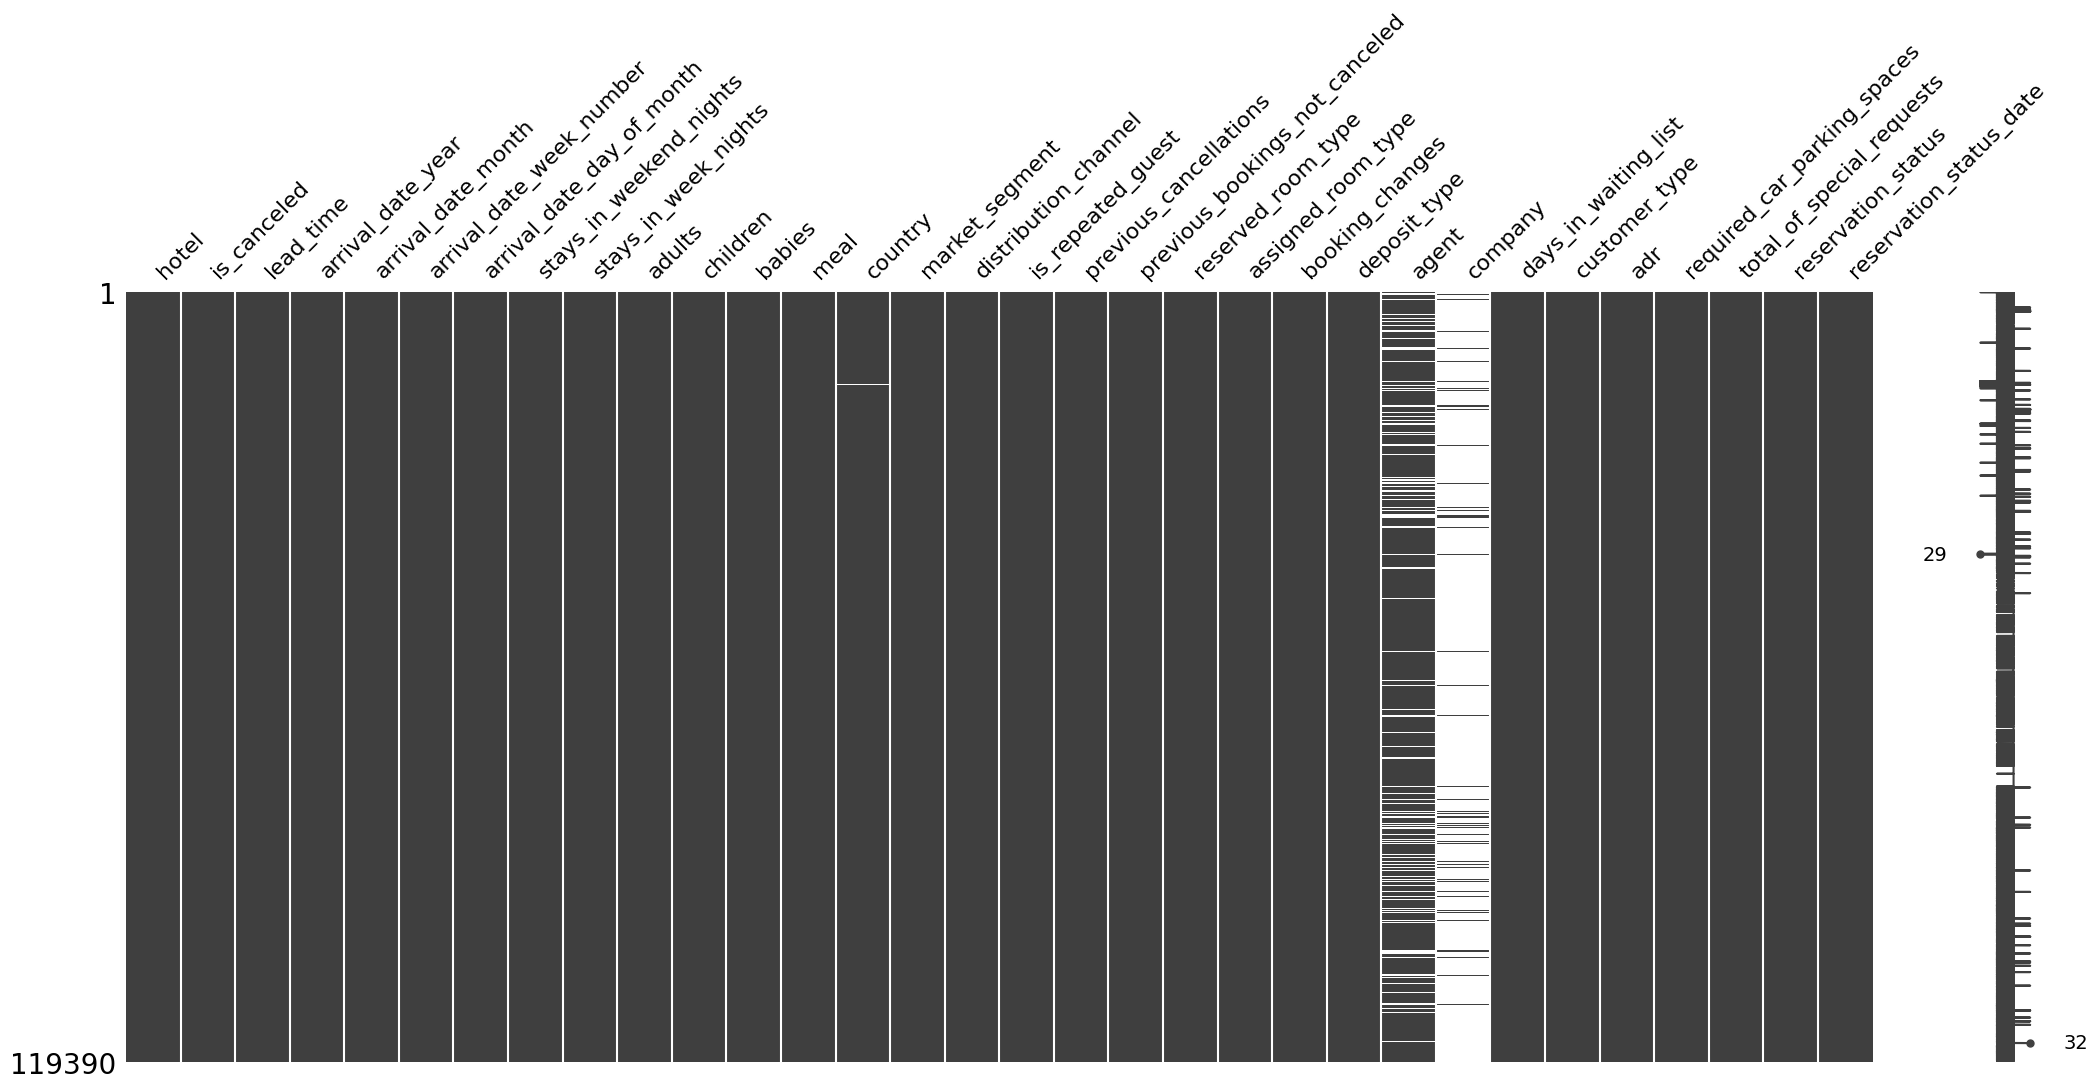

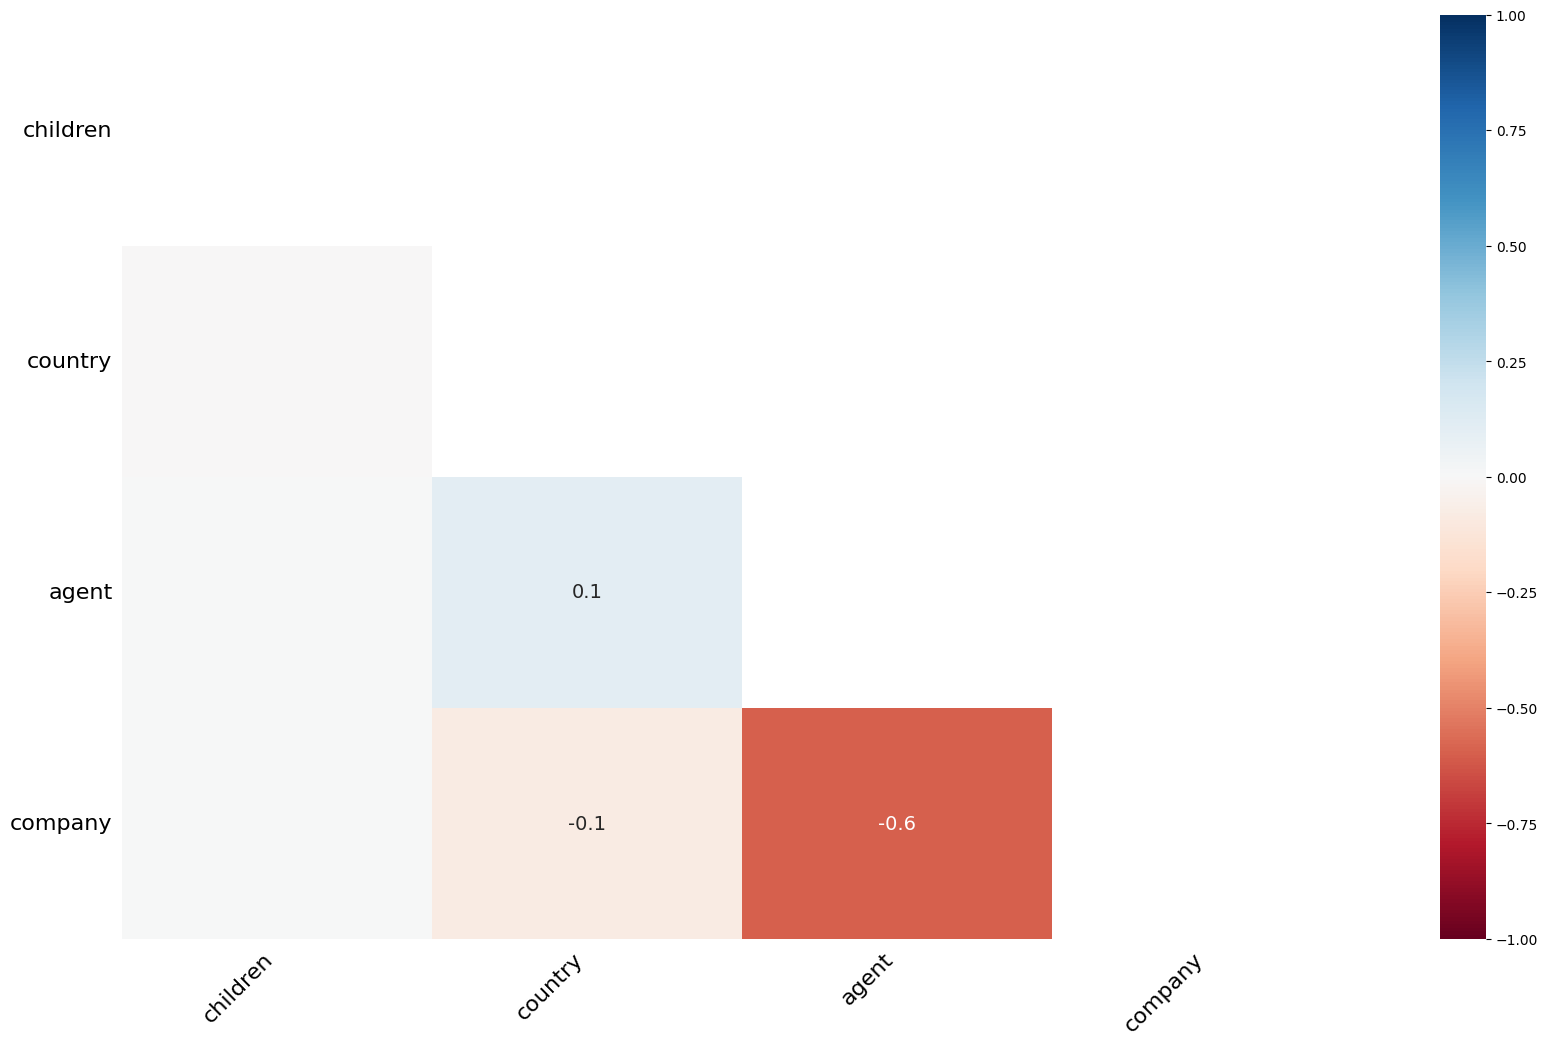

In [7]:
#lets make a matrix to see if it could help ups deduct why these values are missing
msno.matrix(hotel_bookings)
plt.show()
# there is not much to see here the missing values for agent and company are evenly spread out. lets check the heatmap for more info
msno.heatmap(hotel_bookings)
plt.show()
#it seems that whenever the hotels are booked for the most occasions by agents its not booked by a company (the company values are missing) and vice versa which would is normal
# i will conclude that the values missing for agent and company is normal but we might need to make them more presentable instead of being missing

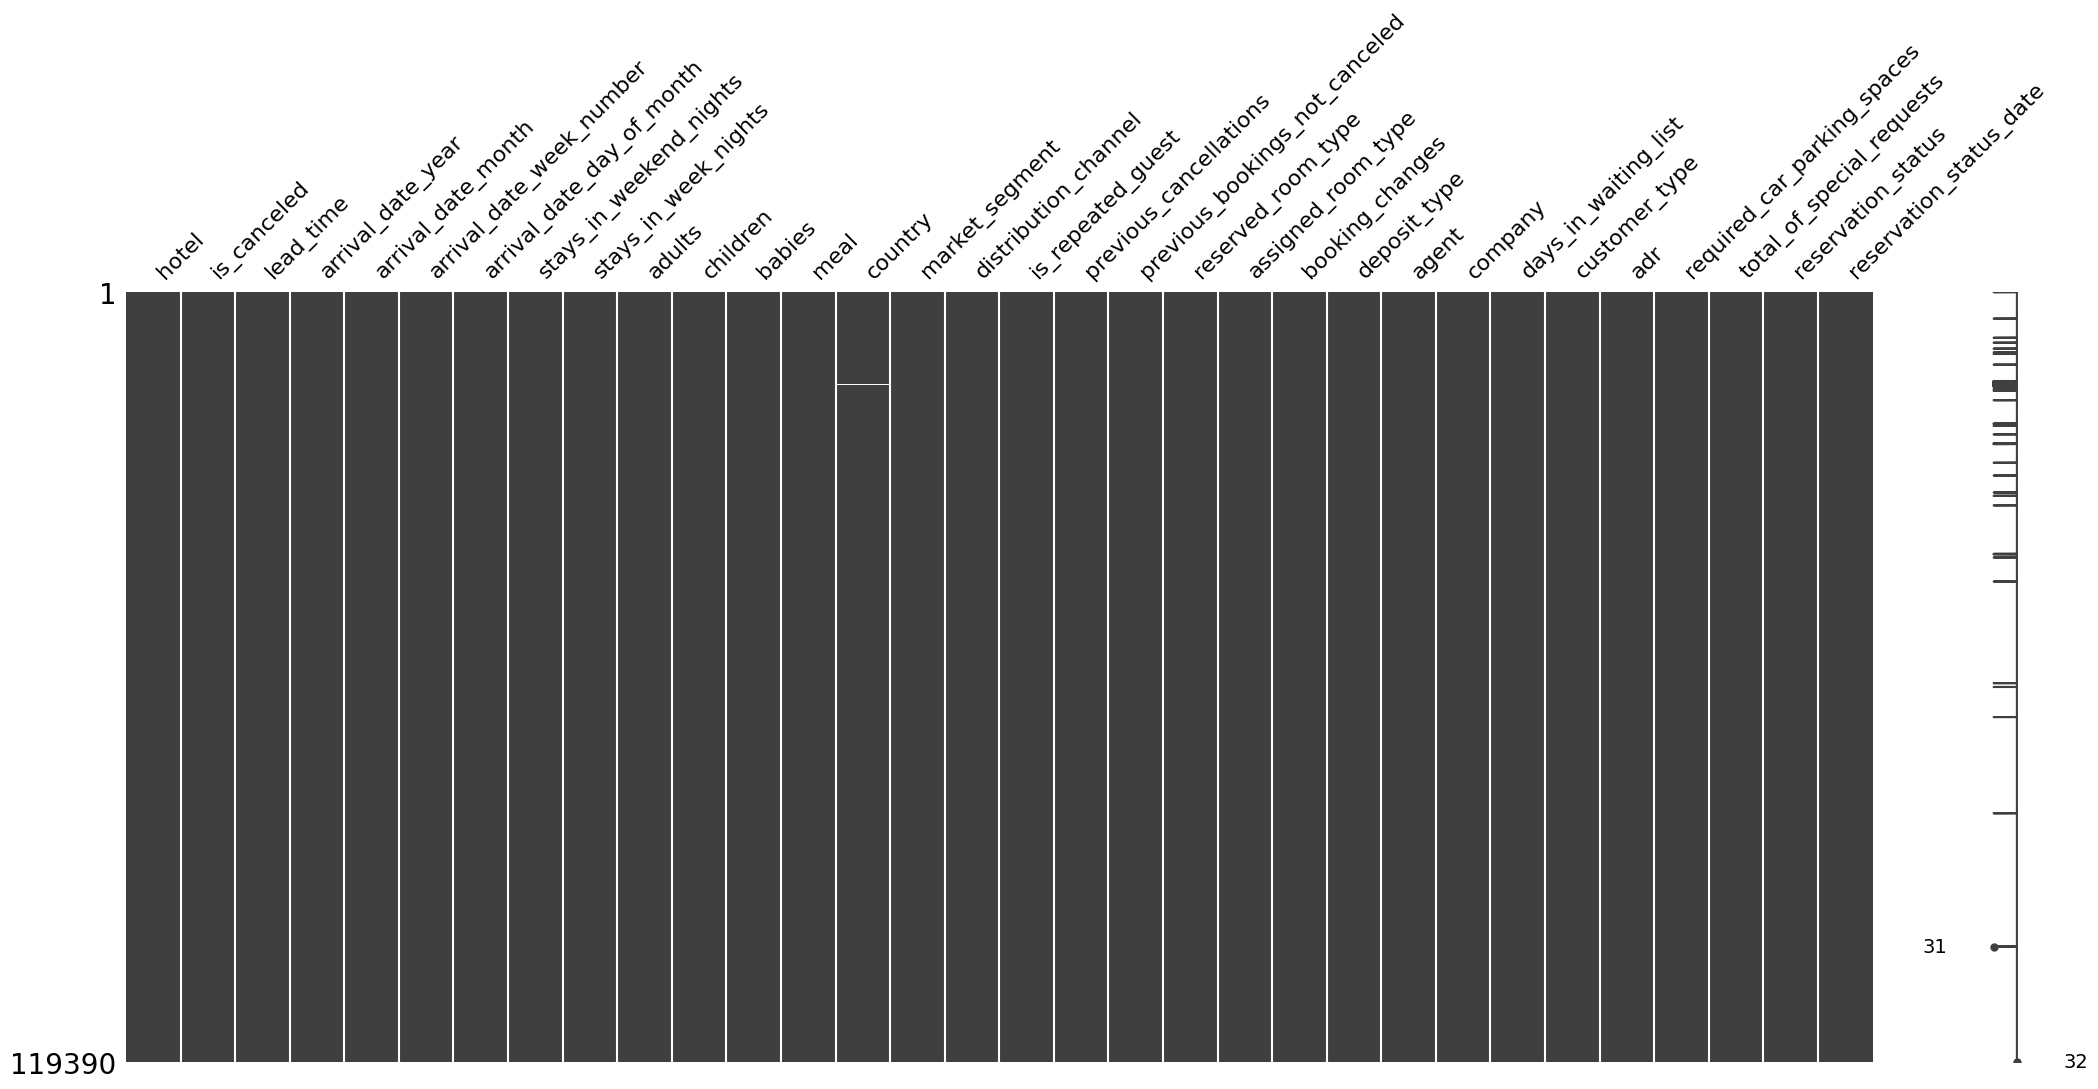

               hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July     

In [8]:
#first we change company and agent's types to str to fill the missing values appropriately.
hotel_bookings['company']= hotel_bookings['company'].astype('str')
hotel_bookings['agent']= hotel_bookings['agent'].astype('str')
#now we can fill the missing value with text
hotel_bookings['company']=hotel_bookings['company'].str.replace('nan','Not used for booking')
hotel_bookings['agent']=hotel_bookings['agent'].str.replace('nan','Not used for booking')
#now we can check if the values have been filled
#no errors were found lets check through a matrix
msno.matrix(hotel_bookings)
plt.show()
#as you can see no missing values lets check rows with the new value 
print(hotel_bookings[hotel_bookings['company']=='Not used for booking'])
#the rows are shown with their new value

In [9]:
#now lets check the missing values in the other 2 columns. First start with country
#since i have no outside knowledge of these countries i will assign them as undisclosed
hotel_bookings['country'].fillna('undisclosed',inplace=True)
#now we check
print(hotel_bookings['country'].isna().sum())
hotel_bookings.loc[hotel_bookings['country']=='undisclosed',['country']]
#filled the missing values for countries now we fill the last one with the least missing values children


0


C:\Users\karee\AppData\Local\Temp\ipykernel_25940\2146155814.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hotel_bookings['country'].fillna('undisclosed',inplace=True)


,country
30,undisclosed
4127,undisclosed
7092,undisclosed
7860,undisclosed
8779,undisclosed
...,...
65908,undisclosed
65909,undisclosed
65910,undisclosed
80830,undisclosed


In [10]:
#i will try to make sure if these are actual children or not from the babies column
hotel_bookings.loc[hotel_bookings['children'].isna(),['adults','children','babies','is_repeated_guest']]
#the missing chlidren were not babies
#its safe to put the number of children in these families as 0 since there are only 4 columns so its probably an input error
hotel_bookings['children'].fillna(0,inplace=True)
#now we make sure it has been filled
hotel_bookings['children'].isna().sum()
#no missing values for the children column

C:\Users\karee\AppData\Local\Temp\ipykernel_25940\1221874405.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hotel_bookings['children'].fillna(0,inplace=True)


0

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

<Axes: >

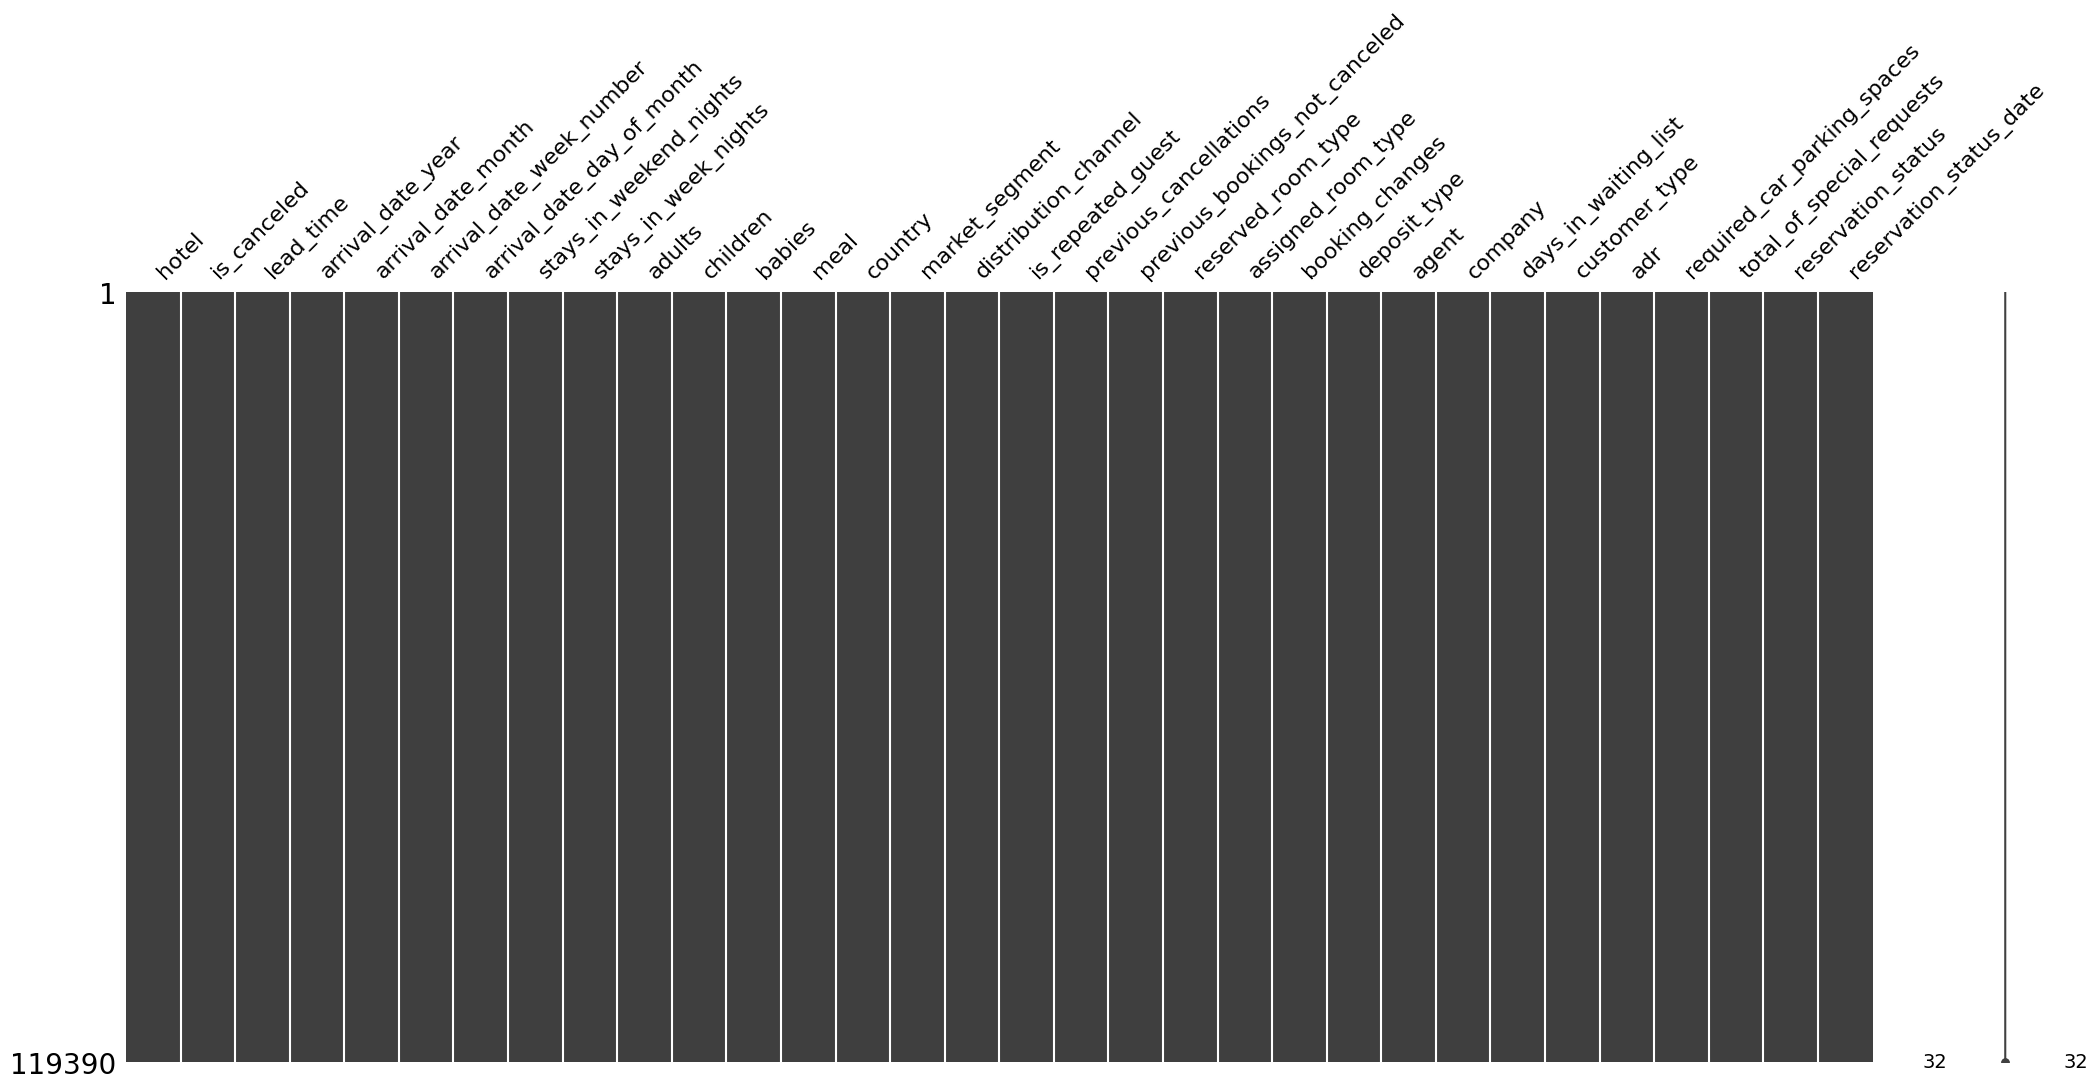

In [11]:
print(hotel_bookings.isna().sum())
msno.matrix(hotel_bookings)
#as you can see there are no missing values anymore in the dataset

# 2. Inconsistent Data Types
### Lets check every data type and assign it its appropriate type

In [12]:
#First we check for the info of the dataset to know its data types
hotel_bookings.info()
#checking the head to know the contents of each column again
hotel_bookings.head()
#now we can see the types of each column and the values of some of the rows to know if its data type is accurate. lets start with the is_canceled column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,Not used for booking,Not used for booking,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,Not used for booking,Not used for booking,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,Not used for booking,Not used for booking,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,Not used for booking,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,Not used for booking,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [13]:
#Lets check on the is_canceled column
print(hotel_bookings['is_canceled'].unique())
#The column is and int with the values of 0 and 1. We will change that to a category type with the values of yes or no
#first we change its type
hotel_bookings['is_canceled'].astype('category')
#now we change the values to yes or no
hotel_bookings['is_canceled']=hotel_bookings['is_canceled'].replace(0,'no')
hotel_bookings['is_canceled']=hotel_bookings['is_canceled'].replace(1,'yes')
#checking if the new values are assigned or not
hotel_bookings['is_canceled'].unique()
#the type and values are changed.





[0 1]


array(['no', 'yes'], dtype=object)

In [14]:
#Lets do the same thing with the is_repeated_guest column 
print(hotel_bookings['is_repeated_guest'].unique())
#The column is and int with the values of 0 and 1. We will change that to a category type with the values of yes or no
#first we change its type
hotel_bookings['is_repeated_guest'].astype('category')
#now we change the values to yes or no
hotel_bookings['is_repeated_guest']=hotel_bookings['is_repeated_guest'].replace(0,'no')
hotel_bookings['is_repeated_guest']=hotel_bookings['is_repeated_guest'].replace(1,'yes')
#checking if the new values are assigned or not
hotel_bookings['is_repeated_guest'].unique()
#the type and values are changed.

[0 1]


array(['no', 'yes'], dtype=object)

In [15]:
#lets make a single date column out of arrival_date columns
hotel_bookings['arrival_date'] = pd.to_datetime(hotel_bookings['arrival_date_year'].astype('str') + '-' + hotel_bookings['arrival_date_month'].astype('str') + hotel_bookings['arrival_date_day_of_month'].astype('str'),errors='coerce')
hotel_bookings['arrival_date'].head()
#successfully created a complete arrival date column



0   2015-07-01
1   2015-07-01
2   2015-07-01
3   2015-07-01
4   2015-07-01
Name: arrival_date, dtype: datetime64[ns]

In [16]:
#changing reservation status date column into date type
hotel_bookings['reservation_status_date']=pd.to_datetime(hotel_bookings['reservation_status_date'])
hotel_bookings['reservation_status_date'].dtype 
#change is successful

dtype('<M8[ns]')

In [17]:
hotel_bookings.info()
hotel_bookings.head()
#now all columns have there aproppriate data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  object        
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119390 non-null  float64

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
0,Resort Hotel,no,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,no,0,0,C,C,3,No Deposit,Not used for booking,Not used for booking,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
1,Resort Hotel,no,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,no,0,0,C,C,4,No Deposit,Not used for booking,Not used for booking,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
2,Resort Hotel,no,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,no,0,0,A,C,0,No Deposit,Not used for booking,Not used for booking,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
3,Resort Hotel,no,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,no,0,0,A,A,0,No Deposit,304.0,Not used for booking,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
4,Resort Hotel,no,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,no,0,0,A,A,0,No Deposit,240.0,Not used for booking,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01


# 3. Duplicates & Redundancy


In [18]:
hotel_bookings.duplicated().sum()
#there are 31994 duplicates in this data set. lets check on that
hotel_bookings[hotel_bookings.duplicated()]



,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
5,Resort Hotel,no,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,no,0,0,A,A,0,No Deposit,240.0,Not used for booking,0,Transient,98.00,0,1,Check-Out,2015-07-03,2015-07-01
22,Resort Hotel,no,72,2015,July,27,1,2,4,2,0.0,0,BB,PRT,Direct,Direct,no,0,0,A,A,1,No Deposit,250.0,Not used for booking,0,Transient,84.67,0,1,Check-Out,2015-07-07,2015-07-01
43,Resort Hotel,no,70,2015,July,27,2,2,3,2,0.0,0,HB,ROU,Direct,Direct,no,0,0,E,E,0,No Deposit,250.0,Not used for booking,0,Transient,137.00,0,1,Check-Out,2015-07-07,2015-07-02
138,Resort Hotel,yes,5,2015,July,28,5,1,0,2,0.0,0,BB,PRT,Online TA,TA/TO,no,0,0,D,D,0,No Deposit,240.0,Not used for booking,0,Transient,97.00,0,0,Canceled,2015-07-01,2015-07-05
200,Resort Hotel,no,0,2015,July,28,7,0,1,1,0.0,0,BB,GBR,Online TA,TA/TO,no,0,0,A,A,0,No Deposit,240.0,Not used for booking,0,Transient,109.80,0,3,Check-Out,2015-07-08,2015-07-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,no,186,2017,August,35,31,0,3,2,0.0,0,BB,DEU,Online TA,TA/TO,no,0,0,D,D,0,No Deposit,9.0,Not used for booking,0,Transient,126.00,0,2,Check-Out,2017-09-03,2017-08-31
119352,City Hotel,no,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,no,0,0,D,D,0,No Deposit,9.0,Not used for booking,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03,2017-08-31
119353,City Hotel,no,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,no,0,0,D,D,0,No Deposit,9.0,Not used for booking,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03,2017-08-31
119354,City Hotel,no,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,no,0,0,D,D,0,No Deposit,9.0,Not used for booking,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03,2017-08-31


In [19]:
#first we drop the complete duplicates
hotel_bookings.drop_duplicates(inplace=True)
hotel_bookings.duplicated().sum()
#we will check for incomplete duplicates in the end

0

# 4. Correcting errors.

In [20]:
#lets check for errors. first i want to check if the arrival date and resercvation date are acurate by making sure arrival date is after or the same as the reservation date
hotel_bookings[hotel_bookings['arrival_date']<hotel_bookings['reservation_status_date']]
#there are many dates where the arrival happens before the reservation which is impossible

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
2,Resort Hotel,no,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,no,0,0,A,C,0,No Deposit,Not used for booking,Not used for booking,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07-01
3,Resort Hotel,no,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,no,0,0,A,A,0,No Deposit,304.0,Not used for booking,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07-01
4,Resort Hotel,no,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,no,0,0,A,A,0,No Deposit,240.0,Not used for booking,0,Transient,98.00,0,1,Check-Out,2015-07-03,2015-07-01
6,Resort Hotel,no,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,no,0,0,C,C,0,No Deposit,Not used for booking,Not used for booking,0,Transient,107.00,0,0,Check-Out,2015-07-03,2015-07-01
7,Resort Hotel,no,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,no,0,0,C,C,0,No Deposit,303.0,Not used for booking,0,Transient,103.00,0,1,Check-Out,2015-07-03,2015-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,no,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,no,0,0,A,A,0,No Deposit,394.0,Not used for booking,0,Transient,96.14,0,0,Check-Out,2017-09-06,2017-08-30
119386,City Hotel,no,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,no,0,0,E,E,0,No Deposit,9.0,Not used for booking,0,Transient,225.43,0,2,Check-Out,2017-09-07,2017-08-31
119387,City Hotel,no,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,no,0,0,D,D,0,No Deposit,9.0,Not used for booking,0,Transient,157.71,0,4,Check-Out,2017-09-07,2017-08-31
119388,City Hotel,no,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,no,0,0,A,A,0,No Deposit,89.0,Not used for booking,0,Transient,104.40,0,0,Check-Out,2017-09-07,2017-08-31


In [21]:
#i have chosen to change the reservations date value for dates that come after the arrival date. i will changes them basde on the lead time column
reservation_date=hotel_bookings['arrival_date']-pd.to_timedelta(hotel_bookings['lead_time'],unit='D')
reservation_date




0        2014-07-24
1        2013-06-24
2        2015-06-24
3        2015-06-18
4        2015-06-17
            ...    
119385   2017-08-07
119386   2017-05-21
119387   2017-07-28
119388   2017-05-14
119389   2017-02-05
Length: 87396, dtype: datetime64[ns]

In [22]:
#now we change the reservation dates based on the correct values
hotel_bookings['reservation_status_date']=reservation_date
#lets check if there are any reservation dates the come after the arrival dates
hotel_bookings[hotel_bookings['reservation_status_date']>hotel_bookings['arrival_date']]
#no dates were found

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date


In [23]:
#checking the is_cancelled column where the value is yes but the reservation status is on check out
print(hotel_bookings[(hotel_bookings['is_canceled']=='yes')&(hotel_bookings['reservation_status']=='Check-Out')])
#there are no rows like that.Now lets check the same thing but the opposite
print(hotel_bookings[(hotel_bookings['is_canceled']=='no')&(hotel_bookings['reservation_status']=='Canceled')])
#both kind of rows dont exist which means both columns are error free



Empty DataFrame
Columns: [hotel, is_canceled, lead_time, arrival_date_year, arrival_date_month, arrival_date_week_number, arrival_date_day_of_month, stays_in_weekend_nights, stays_in_week_nights, adults, children, babies, meal, country, market_segment, distribution_channel, is_repeated_guest, previous_cancellations, previous_bookings_not_canceled, reserved_room_type, assigned_room_type, booking_changes, deposit_type, agent, company, days_in_waiting_list, customer_type, adr, required_car_parking_spaces, total_of_special_requests, reservation_status, reservation_status_date, arrival_date]
Index: []
Empty DataFrame
Columns: [hotel, is_canceled, lead_time, arrival_date_year, arrival_date_month, arrival_date_week_number, arrival_date_day_of_month, stays_in_weekend_nights, stays_in_week_nights, adults, children, babies, meal, country, market_segment, distribution_channel, is_repeated_guest, previous_cancellations, previous_bookings_not_canceled, reserved_room_type, assigned_room_type, bookin

In [24]:
#lets check if there are row with  zero adults
hotel_bookings[hotel_bookings['adults']==0]
#it wouldn't make sense if there was bookings where there is no adults.

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
2224,Resort Hotel,no,1,2015,October,41,6,0,3,0,0.0,0,SC,PRT,Corporate,Corporate,no,0,0,A,I,1,No Deposit,Not used for booking,174.0,0,Transient-Party,0.00,0,0,Check-Out,2015-10-05,2015-10-06
2409,Resort Hotel,no,0,2015,October,42,12,0,0,0,0.0,0,SC,PRT,Corporate,Corporate,no,0,0,A,I,0,No Deposit,Not used for booking,174.0,0,Transient,0.00,0,0,Check-Out,2015-10-12,2015-10-12
3181,Resort Hotel,no,36,2015,November,47,20,1,2,0,0.0,0,SC,ESP,Groups,TA/TO,no,0,0,A,C,0,No Deposit,38.0,Not used for booking,0,Transient-Party,0.00,0,0,Check-Out,2015-10-15,2015-11-20
3684,Resort Hotel,no,165,2015,December,53,30,1,4,0,0.0,0,SC,PRT,Groups,TA/TO,no,0,0,A,A,1,No Deposit,308.0,Not used for booking,122,Transient-Party,0.00,0,0,Check-Out,2015-07-18,2015-12-30
3708,Resort Hotel,no,165,2015,December,53,30,2,4,0,0.0,0,SC,PRT,Groups,TA/TO,no,0,0,A,C,1,No Deposit,308.0,Not used for booking,122,Transient-Party,0.00,0,0,Check-Out,2015-07-18,2015-12-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117204,City Hotel,no,296,2017,July,30,27,1,3,0,2.0,0,BB,GBR,Online TA,TA/TO,no,0,0,B,A,0,No Deposit,9.0,Not used for booking,0,Transient,98.85,0,1,Check-Out,2016-10-04,2017-07-27
117274,City Hotel,no,276,2017,July,31,30,2,1,0,2.0,0,BB,DEU,Online TA,TA/TO,no,0,0,B,B,1,No Deposit,9.0,Not used for booking,0,Transient,93.64,0,2,Check-Out,2016-10-27,2017-07-30
117303,City Hotel,no,291,2017,July,30,29,2,2,0,2.0,0,BB,PRT,Online TA,TA/TO,no,0,0,B,A,0,No Deposit,9.0,Not used for booking,0,Transient,98.85,0,1,Check-Out,2016-10-11,2017-07-29
117453,City Hotel,no,159,2017,July,31,31,1,3,0,2.0,0,SC,FRA,Online TA,TA/TO,no,0,0,A,A,1,No Deposit,9.0,Not used for booking,0,Transient,121.88,0,1,Check-Out,2017-02-22,2017-07-31


In [25]:
#i will drop the rows with no adults based on the adr value.i deducted that if row has 0 adults and has and adr below an appropriate minimum then its not an actual bookin
hotel_bookings=hotel_bookings[~((hotel_bookings['adr']<30)&(hotel_bookings['adults']==0))]
#lets make sure the have been dropped
hotel_bookings[(hotel_bookings['adr']<30)&(hotel_bookings['adults']==0)]
#they were successfully droped


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date


In [26]:
#lets check the rows with zero adults again
hotel_bookings[hotel_bookings['adults']==0]
#there are 385 rows left.


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
46132,City Hotel,yes,6,2015,December,51,13,1,0,0,3.0,0,BB,PRT,Online TA,TA/TO,no,0,0,B,B,0,No Deposit,8.0,Not used for booking,0,Transient-Party,104.25,0,1,Canceled,2015-12-07,2015-12-13
46150,City Hotel,no,6,2015,December,51,18,0,1,0,2.0,1,BB,PRT,Online TA,TA/TO,no,0,0,B,B,0,No Deposit,9.0,Not used for booking,0,Transient-Party,77.00,0,2,Check-Out,2015-12-12,2015-12-18
46196,City Hotel,yes,12,2015,December,52,24,0,2,0,2.0,0,BB,BEL,Online TA,TA/TO,no,0,0,B,B,0,No Deposit,9.0,Not used for booking,0,Transient-Party,77.25,0,1,Canceled,2015-12-12,2015-12-24
46220,City Hotel,no,7,2015,December,52,26,2,1,0,2.0,0,BB,ESP,Online TA,TA/TO,no,0,0,B,B,0,No Deposit,9.0,Not used for booking,0,Transient-Party,83.58,0,0,Check-Out,2015-12-19,2015-12-26
46688,City Hotel,yes,11,2016,January,3,15,2,2,0,2.0,0,BB,OMN,Online TA,TA/TO,no,0,0,B,B,0,No Deposit,9.0,Not used for booking,0,Transient-Party,77.25,0,0,Canceled,2016-01-04,2016-01-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117130,City Hotel,no,329,2017,July,30,24,1,5,0,2.0,0,BB,GBR,Online TA,TA/TO,no,0,0,B,B,0,No Deposit,9.0,Not used for booking,0,Transient,91.85,0,3,Check-Out,2016-08-29,2017-07-24
117204,City Hotel,no,296,2017,July,30,27,1,3,0,2.0,0,BB,GBR,Online TA,TA/TO,no,0,0,B,A,0,No Deposit,9.0,Not used for booking,0,Transient,98.85,0,1,Check-Out,2016-10-04,2017-07-27
117274,City Hotel,no,276,2017,July,31,30,2,1,0,2.0,0,BB,DEU,Online TA,TA/TO,no,0,0,B,B,1,No Deposit,9.0,Not used for booking,0,Transient,93.64,0,2,Check-Out,2016-10-27,2017-07-30
117303,City Hotel,no,291,2017,July,30,29,2,2,0,2.0,0,BB,PRT,Online TA,TA/TO,no,0,0,B,A,0,No Deposit,9.0,Not used for booking,0,Transient,98.85,0,1,Check-Out,2016-10-11,2017-07-29


In [27]:
#we will drop incorrect rows by filtering some specific columns with unacceptable values
hotel_bookings=hotel_bookings[~((hotel_bookings['adults']==0)&(hotel_bookings['stays_in_weekend_nights']==0)&(hotel_bookings['stays_in_week_nights']==0)&(hotel_bookings['is_canceled']=='no'))]


In [28]:
#lets check how many remaing row with zero adults
hotel_bookings[hotel_bookings['adults']==0]
#there are still 204 rows

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
46132,City Hotel,yes,6,2015,December,51,13,1,0,0,3.0,0,BB,PRT,Online TA,TA/TO,no,0,0,B,B,0,No Deposit,8.0,Not used for booking,0,Transient-Party,104.25,0,1,Canceled,2015-12-07,2015-12-13
46150,City Hotel,no,6,2015,December,51,18,0,1,0,2.0,1,BB,PRT,Online TA,TA/TO,no,0,0,B,B,0,No Deposit,9.0,Not used for booking,0,Transient-Party,77.00,0,2,Check-Out,2015-12-12,2015-12-18
46196,City Hotel,yes,12,2015,December,52,24,0,2,0,2.0,0,BB,BEL,Online TA,TA/TO,no,0,0,B,B,0,No Deposit,9.0,Not used for booking,0,Transient-Party,77.25,0,1,Canceled,2015-12-12,2015-12-24
46220,City Hotel,no,7,2015,December,52,26,2,1,0,2.0,0,BB,ESP,Online TA,TA/TO,no,0,0,B,B,0,No Deposit,9.0,Not used for booking,0,Transient-Party,83.58,0,0,Check-Out,2015-12-19,2015-12-26
46688,City Hotel,yes,11,2016,January,3,15,2,2,0,2.0,0,BB,OMN,Online TA,TA/TO,no,0,0,B,B,0,No Deposit,9.0,Not used for booking,0,Transient-Party,77.25,0,0,Canceled,2016-01-04,2016-01-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117130,City Hotel,no,329,2017,July,30,24,1,5,0,2.0,0,BB,GBR,Online TA,TA/TO,no,0,0,B,B,0,No Deposit,9.0,Not used for booking,0,Transient,91.85,0,3,Check-Out,2016-08-29,2017-07-24
117204,City Hotel,no,296,2017,July,30,27,1,3,0,2.0,0,BB,GBR,Online TA,TA/TO,no,0,0,B,A,0,No Deposit,9.0,Not used for booking,0,Transient,98.85,0,1,Check-Out,2016-10-04,2017-07-27
117274,City Hotel,no,276,2017,July,31,30,2,1,0,2.0,0,BB,DEU,Online TA,TA/TO,no,0,0,B,B,1,No Deposit,9.0,Not used for booking,0,Transient,93.64,0,2,Check-Out,2016-10-27,2017-07-30
117303,City Hotel,no,291,2017,July,30,29,2,2,0,2.0,0,BB,PRT,Online TA,TA/TO,no,0,0,B,A,0,No Deposit,9.0,Not used for booking,0,Transient,98.85,0,1,Check-Out,2016-10-11,2017-07-29


In [29]:
#i have decided that the rest of the rows where there are no adults should not be dropped and i will assign there adult column with the most common value of that column
hotel_bookings['adults'].mean()
#the most common value for the adults is 2. now i will assign all the rows with adult = 0 as 2
hotel_bookings.loc[hotel_bookings['adults']==0,'adults']=2

In [30]:
hotel_bookings[hotel_bookings['adults']==0]
#no adult rows with the value of zero left

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date


In [31]:
#checking if there are baby values that are bigger than the children
hotel_bookings[hotel_bookings['children']<hotel_bookings['babies']]
#there 742 rows where there are more babies than children which is an error because babies are children

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
109,Resort Hotel,no,102,2015,July,27,4,2,5,2,0.0,1,BB,PRT,Online TA,TA/TO,no,0,0,A,A,0,No Deposit,240.0,Not used for booking,0,Transient,73.80,0,2,Check-Out,2015-03-24,2015-07-04
111,Resort Hotel,no,78,2015,July,27,4,2,5,2,0.0,1,HB,PRT,Online TA,TA/TO,no,0,0,E,F,0,No Deposit,240.0,Not used for booking,0,Transient,139.00,0,2,Check-Out,2015-04-17,2015-07-04
165,Resort Hotel,no,84,2015,July,28,6,1,3,2,0.0,1,BB,PRT,Online TA,TA/TO,no,0,0,D,E,1,No Deposit,240.0,Not used for booking,0,Transient,97.00,0,2,Check-Out,2015-04-13,2015-07-06
236,Resort Hotel,no,78,2015,July,28,9,0,3,2,0.0,1,BB,PRT,Online TA,TA/TO,no,0,0,A,A,0,No Deposit,240.0,Not used for booking,0,Transient,82.00,0,2,Check-Out,2015-04-22,2015-07-09
264,Resort Hotel,no,21,2015,July,28,10,2,3,2,0.0,2,HB,PRT,Direct,Direct,no,0,0,C,C,1,No Deposit,250.0,Not used for booking,0,Transient,165.00,1,3,Check-Out,2015-06-19,2015-07-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118423,City Hotel,no,28,2017,August,33,18,0,2,2,0.0,1,BB,PRT,Direct,Direct,no,0,0,A,A,1,No Deposit,14.0,Not used for booking,0,Transient,140.80,0,1,Check-Out,2017-07-21,2017-08-18
118437,City Hotel,no,0,2017,August,33,19,0,1,2,0.0,1,BB,ESP,Direct,Direct,no,0,0,D,D,0,No Deposit,Not used for booking,Not used for booking,0,Transient,169.00,0,0,Check-Out,2017-08-19,2017-08-19
118571,City Hotel,no,101,2017,August,33,17,2,3,2,0.0,1,BB,ESP,Offline TA/TO,TA/TO,no,0,0,A,A,0,No Deposit,138.0,Not used for booking,0,Transient,80.10,0,1,Check-Out,2017-05-08,2017-08-17
118794,City Hotel,no,109,2017,August,34,20,2,4,2,0.0,1,BB,COL,Direct,Direct,no,0,0,B,B,2,No Deposit,14.0,Not used for booking,0,Transient-Party,146.25,0,2,Check-Out,2017-05-03,2017-08-20


In [32]:
#i have decided to make the value of the children column in the rows where children are lower than babies to be equal to babies as the minimum
hotel_bookings.loc[hotel_bookings['children']<hotel_bookings['babies'],'children']=hotel_bookings.loc[hotel_bookings['children']<hotel_bookings['babies'],'babies']
#lets check if it was successfull
hotel_bookings[hotel_bookings['children']<hotel_bookings['babies']]
#there zero rows where there more babies than children


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date


# 5-Normalization

In [33]:
#lets check the unique values for each object column
for column in hotel_bookings.columns:
    if hotel_bookings[column].dtype=='object':
        unique_values=hotel_bookings[column].unique()
        print(unique_values)
# it seems all unique values are accurate and there are no repeated values but lets check the country column just to make sure
    

['Resort Hotel' 'City Hotel']
['no' 'yes']
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
['BB' 'FB' 'HB' 'SC' 'Undefined']
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'undisclosed' 'ROU' 'NOR' 'OMN' 'ARG'
 'POL' 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS'
 'EST' 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX'
 'MAR' 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF'
 'AGO' 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN'
 'JAM' 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL'
 'GGY' 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL'
 'SEN' 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA'
 'CUB' 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP'
 'BDI' 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL'
 'UZB' 'NPL' 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH' 'IRQ' 'HND'
 'RWA'

In [34]:
#comparing every unique value with all others unique value to see if any value is similar enought to be the same as the unique value
#first i will chech the size of the unique values before to see if there amount decreased or not
print(hotel_bookings['country'].unique().size)
unique_values=hotel_bookings['country'].unique()
for value in unique_values:
    j=process.extract(value,unique_values,limit=len(unique_values))
    for match in j:
        if match[1]>90:
            hotel_bookings.loc[hotel_bookings['country']==match[0],'country']=value
#now we check the size after to see if there is any difference to the amount of unique values
print(hotel_bookings['country'].unique().size)
#there is no difference therefore all values were unique and there was no need for normalization


178
178


# 6-incomplete duplicates

In [35]:
#checking duplicates based on specific columns
dupes=hotel_bookings[hotel_bookings.duplicated(keep=False,subset=['adults','children','babies','country','reservation_status_date','arrival_date'])]
dupes
#there are 22455 incomplete duplicates

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
14,Resort Hotel,no,37,2015,July,27,1,0,4,2,0.0,0,BB,PRT,Online TA,TA/TO,no,0,0,E,E,0,No Deposit,241.0,Not used for booking,0,Transient,94.71,0,0,Check-Out,2015-05-25,2015-07-01
16,Resort Hotel,no,37,2015,July,27,1,0,4,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,no,0,0,E,E,0,No Deposit,8.0,Not used for booking,0,Contract,97.50,0,0,Check-Out,2015-05-25,2015-07-01
21,Resort Hotel,no,72,2015,July,27,1,2,4,2,0.0,0,BB,PRT,Direct,Direct,no,0,0,A,A,1,No Deposit,250.0,Not used for booking,0,Transient,84.67,0,1,Check-Out,2015-04-20,2015-07-01
23,Resort Hotel,no,72,2015,July,27,1,2,4,2,0.0,0,BB,PRT,Direct,Direct,no,0,0,D,D,1,No Deposit,250.0,Not used for booking,0,Transient,99.67,0,1,Check-Out,2015-04-20,2015-07-01
47,Resort Hotel,no,113,2015,July,27,2,2,5,2,0.0,0,BB,NOR,Offline TA/TO,TA/TO,no,0,0,E,E,0,No Deposit,156.0,Not used for booking,0,Transient-Party,82.88,0,2,Check-Out,2015-03-11,2015-07-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119362,City Hotel,no,198,2017,August,35,29,1,5,2,0.0,0,BB,ITA,Online TA,TA/TO,no,0,0,A,A,2,No Deposit,9.0,Not used for booking,0,Transient,119.17,0,2,Check-Out,2017-02-12,2017-08-29
119367,City Hotel,no,212,2017,August,35,28,2,5,2,0.0,0,BB,PRT,Online TA,TA/TO,no,0,0,A,A,0,No Deposit,7.0,Not used for booking,0,Transient,85.59,0,0,Check-Out,2017-01-28,2017-08-28
119379,City Hotel,no,109,2017,August,35,31,1,3,2,0.0,0,BB,GBR,Online TA,TA/TO,no,0,0,D,D,0,No Deposit,9.0,Not used for booking,0,Transient,155.00,0,1,Check-Out,2017-05-14,2017-08-31
119388,City Hotel,no,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,no,0,0,A,A,0,No Deposit,89.0,Not used for booking,0,Transient,104.40,0,0,Check-Out,2017-05-14,2017-08-31


In [36]:
#checking varying columns
c=hotel_bookings.columns.difference(['adults','children','babies','country','reservation_status_date','arrival_date'])
unique_column_count=dupes.groupby(['adults','children','babies','country','reservation_status_date','arrival_date'])[c].nunique()
varying_columns=unique_column_count.columns[(unique_column_count>1).any()].tolist()
varying_columns
#these are columns with multible values based on the key columns.Now we will aggregate values based on these columns


['adr',
 'agent',
 'assigned_room_type',
 'booking_changes',
 'company',
 'customer_type',
 'days_in_waiting_list',
 'deposit_type',
 'distribution_channel',
 'hotel',
 'is_canceled',
 'is_repeated_guest',
 'market_segment',
 'meal',
 'previous_bookings_not_canceled',
 'previous_cancellations',
 'required_car_parking_spaces',
 'reservation_status',
 'reserved_room_type',
 'stays_in_week_nights',
 'stays_in_weekend_nights',
 'total_of_special_requests']

In [37]:
#reminder of the types of each column at agg corectlly
hotel_bookings.dtypes

hotel                                     object
is_canceled                               object
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                        object
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                 float64
babies                                     int64
meal                                      object
country                                   object
market_segment                            object
distribution_channel                      object
is_repeated_guest                         object
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                        object
assigned_room_type  

In [38]:
#now we aggregate based on the the varying columns.
#we will assign the mode for object where you need the most frequent value,mean for calculations,max to avoid undercounting with numbers,min when choosing to assign early dates for the dates
hotel_bookings=hotel_bookings.groupby(['adults','children','babies','country','reservation_status_date','arrival_date']).agg({
    'adr' : 'mean' 
    ,'agent': lambda x: x.mode().iloc[0] 
    ,'assigned_room_type': lambda x: x.mode().iloc[0]  
    ,'booking_changes':  'max' 
    , 'company': lambda x:x.mode().iloc[0] 
    , 'customer_type': lambda x:x.mode().iloc[0] 
    , 'days_in_waiting_list' : 'max'
    , 'deposit_type' : lambda x: x.mode().iloc[0] 
    , 'distribution_channel' : lambda x: x.mode().iloc[0]
    , 'hotel' : lambda x: x.mode().iloc[0] 
    , 'is_canceled': lambda x: x.mode().iloc[0]
    , 'is_repeated_guest': lambda x: x.mode().iloc[0]
    , 'market_segment': lambda x: x.mode().iloc[0]
    , 'meal' : lambda x: x.mode().iloc[0]
    , 'previous_bookings_not_canceled': 'max'
    , 'previous_cancellations' : 'max'
    , 'required_car_parking_spaces' : 'max'
    , 'reservation_status' : lambda x: x.mode().iloc[0]
    ,  'reserved_room_type' : lambda x: x.mode().iloc[0]
    , 'stays_in_week_nights' : 'max'
    , 'stays_in_weekend_nights' : 'max'
    , 'total_of_special_requests': 'max'
     
})


In [ ]:
#now we check if the agg worked
hotel_bookings.reset_index(inplace=True)
hotel_bookings[hotel_bookings.duplicated(keep=False,subset=['adults','children','babies','country','reservation_status_date','arrival_date'])]
#there are no dupes left.

,adults,children,babies,country,reservation_status_date,arrival_date,adr,agent,assigned_room_type,booking_changes,company,customer_type,days_in_waiting_list,deposit_type,distribution_channel,hotel,is_canceled,is_repeated_guest,market_segment,meal,previous_bookings_not_canceled,previous_cancellations,required_car_parking_spaces,reservation_status,reserved_room_type,stays_in_week_nights,stays_in_weekend_nights,total_of_special_requests


In [39]:
#randomizing rows
hotel_bookings=hotel_bookings.sample(frac=1).reset_index(drop=True)
hotel_bookings

,adr,agent,assigned_room_type,booking_changes,company,customer_type,days_in_waiting_list,deposit_type,distribution_channel,hotel,is_canceled,is_repeated_guest,market_segment,meal,previous_bookings_not_canceled,previous_cancellations,required_car_parking_spaces,reservation_status,reserved_room_type,stays_in_week_nights,stays_in_weekend_nights,total_of_special_requests
0,189.42,241.0,D,1,Not used for booking,Transient,0,No Deposit,TA/TO,Resort Hotel,no,no,Online TA,HB,0,0,0,Check-Out,D,1,1,2
1,91.00,9.0,A,0,Not used for booking,Transient-Party,0,No Deposit,TA/TO,City Hotel,no,no,Online TA,BB,0,0,0,Check-Out,A,1,0,0
2,171.94,241.0,E,0,Not used for booking,Transient,0,No Deposit,TA/TO,Resort Hotel,no,no,Online TA,HB,0,0,0,Check-Out,E,6,4,2
3,48.00,240.0,D,0,Not used for booking,Transient,0,No Deposit,TA/TO,Resort Hotel,no,no,Online TA,BB,0,0,0,Check-Out,A,1,0,1
4,57.74,241.0,F,0,Not used for booking,Transient,0,No Deposit,TA/TO,Resort Hotel,no,no,Online TA,BB,0,0,0,Check-Out,E,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73392,108.00,9.0,A,0,Not used for booking,Transient,0,No Deposit,TA/TO,City Hotel,no,no,Online TA,BB,0,0,0,Check-Out,A,2,1,1
73393,90.50,240.0,D,1,Not used for booking,Transient,0,No Deposit,TA/TO,Resort Hotel,yes,no,Online TA,BB,0,0,0,Canceled,D,3,2,1
73394,89.25,9.0,A,0,Not used for booking,Transient,0,No Deposit,TA/TO,City Hotel,no,no,Online TA,SC,0,0,0,Check-Out,A,3,1,3
73395,131.89,9.0,D,0,Not used for booking,Transient,0,No Deposit,TA/TO,City Hotel,yes,no,Online TA,BB,0,0,0,Canceled,D,4,2,0


In [ ]:
#now to save the clean dataset
hotel_bookings.to_csv('clean_hotel_bookings.csv',index=False)